 # IMPORT


In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:

from IPython.core.display import HTML

In [4]:
import math

In [5]:
import inflection

In [6]:
import seaborn as sns

In [7]:

from matplotlib import pyplot as plt

In [8]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24
display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )
sns.set()


In [9]:
jupyter_settings()


Populating the interactive namespace from numpy and matplotlib


# LOADING DATE

In [10]:
df_sales_raw= pd.read_csv( 'C:/Users/FLAVIA/repor/pythonProject/train.csv',low_memory=False )

df_store_raw= pd.read_csv( 'C:/Users/FLAVIA/repor/pythonProject/store.csv', low_memory=False )
#merge
df_raw=pd.merge(df_sales_raw,df_store_raw, how='left',on='Store')

In [11]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
386323,408,4,2014-07-24,3449,381,1,0,0,0,c,a,1560.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"


# 3 DESCRIÇÃO DE DADOS

In [12]:
df1=df_raw.copy()

In [13]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

##  3.1 RENAME COLUMNS

In [14]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase=lambda x:inflection.underscore (x)

cols_new=list(map(snakecase,cols_old))
#rename
df1.columns=cols_new

In [15]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 3.2  Data Dimensions ( para saber quantas linhas e colunas)

In [16]:
print( 'Number of Rows:{}'.format(df1.shape[0]))
print( 'Number of Cols:{}'.format(df1.shape[1]))

Number of Rows:1017209
Number of Cols:18


## 3.3 DataTypes( mudar date que está como object para datetime64)

In [17]:
df1['date']=pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 3.4 Check NA

In [18]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 3.5 Fillout NA( preencher os NA)

In [19]:
df1['competition_distance'].max()

75860.0

In [20]:
#competition_distacnce
df1['competition_distance']=df1['competition_distance'].apply (lambda x: 200000.0 if math.isnan(x) else  x)
#competition_open_since_month 
df1['competition_open_since_month']=df1.apply (lambda x:x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)
#competition_open_since_year
df1['competition_open_since_year']=df1.apply (lambda x:x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'],axis=1)
#promo2                               
#promo2_since_week  
df1['promo2_since_week']=df1.apply (lambda x:x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)
#promo2_since_year   
df1['promo2_since_year']=df1.apply (lambda x:x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'],axis=1)
#promo_interval                   
month_map={1:'Jan',2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dez'}
df1['promo_interval'].fillna(0,inplace=True)
df1['month_map']=df1['date'].dt.month.map(month_map)
df1['is_promo']=df1[['promo_interval', 'month_map']].apply(lambda x:0 if x['promo_interval']==0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [21]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [22]:
df1.sample(5).T

,990044,303269,425803,924406,576551
store,710,601,659,857,882
day_of_week,5,2,7,1,5
date,2013-01-25 00:00:00,2014-10-21 00:00:00,2014-06-15 00:00:00,2013-03-25 00:00:00,2014-01-31 00:00:00
sales,4925,5015,0,9322,6116
customers,385,371,0,1158,824
open,1,1,0,1,1
promo,1,1,0,1,0
state_holiday,0,0,0,0,0
school_holiday,0,1,0,1,0
store_type,d,d,d,c,a


## 3.6 Change Types

In [23]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [24]:
df1['competition_open_since_month']=df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year']=df1['competition_open_since_year'].astype(int)
df1['promo2_since_week']=df1['promo2_since_week'].astype(int)
df1['promo2_since_year']=df1['promo2_since_year'].astype(int)

In [25]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 3.7 Descriptive Statitical

In [26]:
num_attributes=df1.select_dtypes(include=['int64','float64'])
cat_attributes=df1.select_dtypes(include=['int64','float64', 'datetime64[ns]'])

In [27]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
230871,67,1,13255,1209,1,1,1,410.0,0,0
675805,901,7,0,0,0,0,0,3170.0,0,0


In [28]:
cat_attributes.sample(2)

,store,day_of_week,date,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
20623,554,1,2015-07-13,7021,779,1,1,0,1200.0,0,0
27897,23,1,2015-07-06,5393,480,1,0,0,4060.0,0,0


## 3.7.1 Numerical Attributes

In [29]:
# central Tendency-mean and median
ct1= pd.DataFrame(num_attributes.apply(np.mean)).T
ct2= pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion-max, min , std, range, skew, kurtosis
d1=pd.DataFrame(num_attributes.apply(np.std)).T
d2=pd.DataFrame(num_attributes.apply( min )).T
d3=pd.DataFrame(num_attributes.apply(max)).T
d4=pd.DataFrame(num_attributes.apply(lambda x:x.max()-x.min() )).T
d5=pd.DataFrame(num_attributes.apply(lambda x:x.skew() )).T
d6=pd.DataFrame(num_attributes.apply(lambda x:x.kurtosis() )).T
#Concatenate
m= pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns=['attributes', 'min', 'max','range', 'mean', 'median','std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.159901,0.0,0.366514,1.855857,1.444209


C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

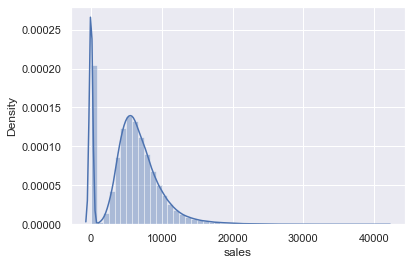

In [30]:
sns.distplot(df1['sales'])

C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

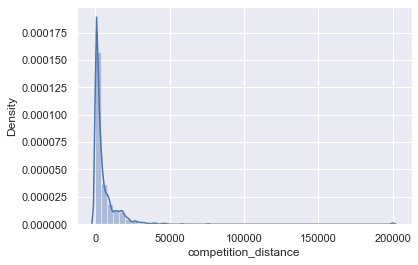

In [31]:
sns.distplot(df1['competition_distance'])

## 3.7.2 Categorial Attributes

In [32]:
cat_attributes.apply(lambda x: x.unique().shape[0])

store                    1115
day_of_week                 7
date                      942
sales                   21734
customers                4086
open                        2
promo                       2
school_holiday              2
competition_distance      655
promo2                      2
is_promo                    2
dtype: int64

<AxesSubplot:xlabel='school_holiday', ylabel='sales'>

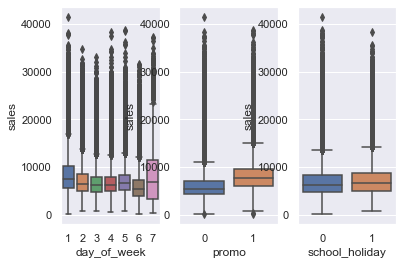

In [36]:
aux1=df1[(df1['day_of_week']!= 0) & (df1['sales']>0)]

plt.subplot(1,3,1)
sns.boxplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='promo', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='school_holiday', y='sales', data=aux1)